<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [112]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [113]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [114]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [115]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 1: Become familiar with the dataset

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [116]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


This is a complete dataset with 506 entries and 14 columns, with no missing values (all columns show 506 non-null counts). The dataset contains various features about different neighborhoods in Boston, collected to predict housing prices.

In [117]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [118]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 2: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

- For the "Median value of owner-occupied homes" provide a boxplot

- Provide a  bar plot for the Charles river variable

- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

- Create a histogram for the pupil to teacher ratio variable



### 1. For the "Median value of owner-occupied homes" provide a boxplot

[Text(0.5, 1.0, 'Median value of owner-occupied homes')]

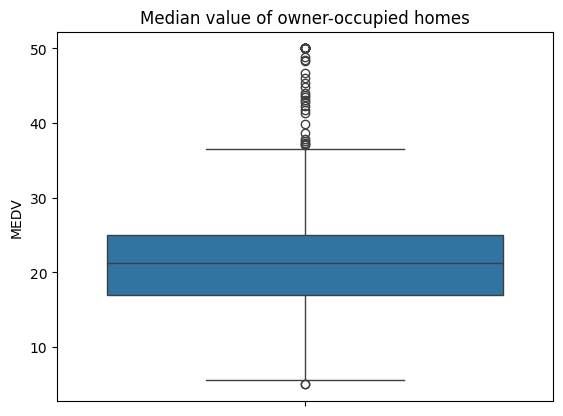

In [119]:
sns.boxplot(y=boston_df['MEDV']).set(title='Median value of owner-occupied homes')

- The distribution is skewed to the right. We can see this from the longer whisker on the right side and the outliers extending further to the right.
- The median value appears to be around 20. This is represented by the line inside the box.
- The IQR, which represents the middle 50% of the data, is relatively narrow. It spans from approximately 18 to 22.
- There are several outliers on the right side of the plot. These are data points that fall outside the expected range based on the IQR.

##### Interpretation
The median home value is around 20.
The middle 50% of homes have values within a narrow range of 18 to 22.
There is a significant portion of homes with values higher than the median, as indicated by the right-skewed distribution and the presence of outliers.
The outliers suggest that there are some homes with exceptionally high values compared to the majority.

###  2. Provide a  bar plot for the Charles river variable

[Text(0.5, 1.0, 'Bar Plot of Charles River')]

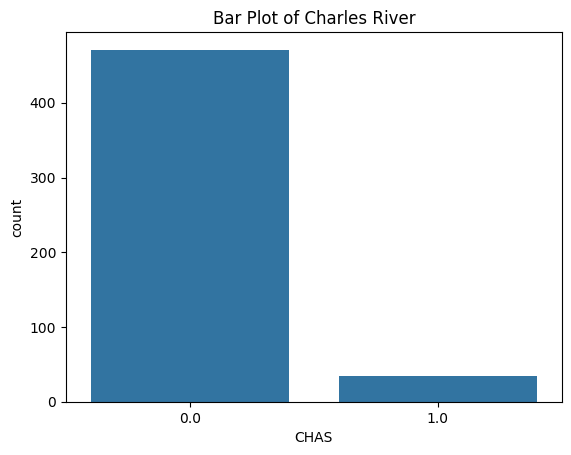

In [120]:
sns.countplot(x='CHAS', data=boston_df).set(title='Bar Plot of Charles River')

- The plot shows the distribution of a binary variable, likely representing whether a property is located near the Charles River (1) or not (0).
- It also reveals that a significant class imbalance. The majority of properties (around 450) are not located near the Charles River (CHAS = 0), while only a small fraction (around 35) are located near the river (CHAS = 1).

##### Interpretation
The bar plot indicates that the dataset is heavily skewed towards properties that are not located near the Charles River.

### 3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

[Text(0.5, 1.0, 'Boxplot of MEDV vs AGE Group')]

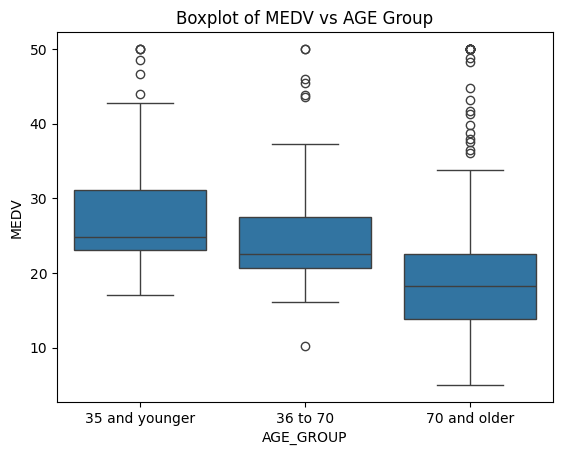

In [121]:
bins = [0, 35, 70, float('inf')]
labels = ['35 and younger', '36 to 70', '70 and older']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df).set(title='Boxplot of MEDV vs AGE Group')

###### Median Values:

- The median MEDV for the "35 and younger" group appears to be higher than the other two groups.
- The median for the "36 to 70" group seems slightly lower than the "35 and younger" group.
- The "70 and older" group has the lowest median MEDV.
  
###### Distribution:

- The boxplots suggest that the distribution of MEDV within each age group might be slightly skewed to the right, as indicated by the longer right whiskers in some cases.
- There are some outliers present in each group, particularly in the "35 and younger" and "70 and older" groups.

###### Interquartile Range (IQR):
- The IQR, which represents the middle 50% of the data, appears to be similar across the three age groups.

##### Interpretation:

- The boxplot suggests a potential relationship between age group and median house values. Younger individuals (35 and younger) seem to have higher median house values compared to older age groups.
- The presence of outliers indicates that there are some houses with significantly higher or lower values within each age group.

### 4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

[Text(0.5, 1.0, 'Scatter Plot of NOX vs INDUS'),
 Text(0.5, 0, 'Nitric oxide concentration  (parts per 10 million)'),
 Text(0, 0.5, 'Proportion of non-retail business acres per town')]

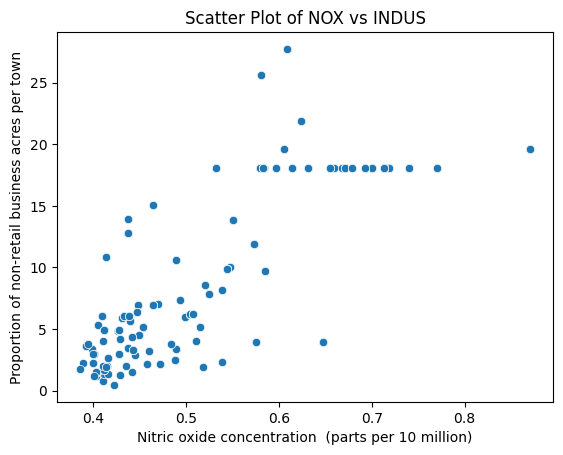

In [122]:
sns.scatterplot(x='NOX', y='INDUS', data=boston_df).set(title='Scatter Plot of NOX vs INDUS', xlabel = "Nitric oxide concentration  (parts per 10 million)", ylabel="Proportion of non-retail business acres per town")

- There appears to be a positive correlation between Nitric Oxide concentration and the proportion of non-retail business acres per town. This means that as the proportion of non-retail business acres increases, the Nitric Oxide concentration tends to increase as well.
- The data points seem to cluster in certain regions of the plot, suggesting that there might be subgroups or patterns within the data.
- There are a few outliers visible, which are data points that deviate significantly from the general trend.

Therefore, their relationship based on the scatter plot suggests that:

#### The air tends to have higher levels of Nitric Oxide in areas where there are more businesses and industries.

### 5. Create a histogram for the pupil to teacher ratio variable

[Text(0.5, 1.0, 'Histogram of Pupil to Teacher Ratio')]

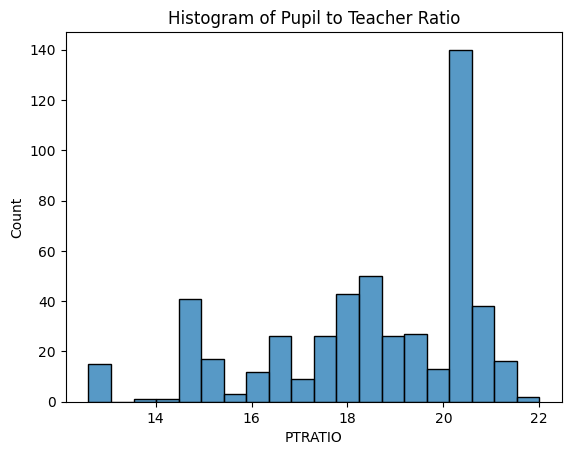

In [123]:
sns.histplot(boston_df['PTRATIO'], kde=False, bins=20).set(title='Histogram of Pupil to Teacher Ratio')

- The distribution of PTRATIO appears to be right-skewed. There are more data points towards the lower end of the range (around 14-18) and fewer towards the higher end (around 20-22).
- The distribution has a peak around the value of 20. This suggests that a large number of schools have a PTRATIO close to 20.
- The PTRATIO values range from approximately 12 to 22.

##### Interpretation:
- The right-skewed distribution indicates that a significant portion of schools have a high PTRATIO, suggesting that some schools might have fewer teachers per pupil compared to others. This could potentially lead to unequal distribution of educational resources.
- A high PTRATIO can have implications for the quality of education, as it may lead to larger class sizes, less individual attention for students, and potentially lower student outcomes.

## Task 3: Use the appropriate tests to answer the questions provided.



### 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)


In [124]:
# Hypothesis:
h0 ="There is no significant difference in the median value of houses bounded by the Charles River."
h1= "There is a significant difference in the median value of houses bounded by the Charles River."

In [125]:
# 1 = Near; 0 = Far

chas_yes = boston_df[boston_df['CHAS'] == 1]['MEDV'] # Near
chas_no = boston_df[boston_df['CHAS'] == 0]['MEDV'] # Far

# Perform t-test
t_stat, p_value = ttest_ind(chas_yes, chas_no, equal_var=True) 
print(f"Solution:\nT-statistic: {t_stat} \nP-value: {p_value}")

print(f"\nConclusion:\n{"Reject null hypothesis. "+h1 if p_value<0.05 else "Accept null hypothesis. "+h0}")


Solution:
T-statistic: 3.996437466090509 
P-value: 7.390623170519905e-05

Conclusion:
Reject null hypothesis. There is a significant difference in the median value of houses bounded by the Charles River.


### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [126]:
# Hypothesis:
h0 ="There is no a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)."
h1= "There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)."

In [127]:
from scipy.stats import f_oneway

# Bin AGE into quartiles for equal groups
boston_df['AGE_group'] = pd.qcut(boston_df['AGE'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

groups = [group['MEDV'].values for _, group in boston_df.groupby('AGE_group')]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)
print(f"Solution:\nF-statistic: {f_stat}, P-value: {p_value}")


print(f"\nConclusion:\n{"Reject null hypothesis. "+h1 if p_value<0.05 else "Accept null hypothesis. "+h0}")


<ipython-input-127-cccdbcbea400>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['MEDV'].values for _, group in boston_df.groupby('AGE_group')]


Solution:
F-statistic: 31.63826705859295, P-value: 9.566925102413718e-19

Conclusion:
Reject null hypothesis. There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).


### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [128]:
# Hypothesis:
h0 ="There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)."
h1= "There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)."

In [129]:
from scipy.stats import pearsonr

# Calculate Pearson correlation
corr_coef, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Solution:\nPearson Correlation Coefficient: {corr_coef}, P-value: {p_value}")

print(f"\nConclusion:\n{"Reject null hypothesis. "+h1 if p_value<0.05 else "Accept null hypothesis. "+h0}")


Solution:
Pearson Correlation Coefficient: 0.7636514469209192, P-value: 7.913361061210442e-98

Conclusion:
Reject null hypothesis. There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation).


### 4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [130]:
# Hypothesis:
h0 ="The distance to employment centers has no effect on house prices."
h1= "The distance to employment centers has an effect on house prices."

In [131]:
import statsmodels.api as sm

X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print("Solution:")
print(model.summary())

print(f"\nConclusion:\n{"Reject null hypothesis. "+h1 if p_value<0.05 else "Accept null hypothesis. "+h0}")


Solution:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 21 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        20:48:30   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.49